# <center> Final Project - Stage 2 (Data Pre-Processing) </center>

**Kelompok : "ASKLEPIOS"** <br>
**Nama Anggota :** <br>
        - Awalsyah Rinanto Putra <br>
        - Fathah Oscar <br>
        - M Rizky Septiansyah <br>
        - Hermawan Febrianto <br>
        - Devi Puji Ayuningsih <br>
        - Anggita Citanegara Lubis

In [1]:
#import library

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# ubah parameter default matplotlib dengan rcParams
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [2]:
# Load data
df = pd.read_csv(r'Ecommerce_finpro.csv')

# Rename kolom 
df = df.rename(columns={'Warehouse_block':'Warehouse',
                        'Mode_of_Shipment':'Shipment',
                        'Customer_care_calls':'Calls',
                        'Customer_rating':'Rating',
                        'Cost_of_the_Product':'Cost',
                        'Prior_purchases':'Purchases',
                        'Product_importance':'Importance',
                        'Discount_offered':'Discount',
                        'Weight_in_gms':'Weight (gram)',
                        'Reached.on.Time_Y.N':'Late'})

# pengelompokkan kolom berdasarkan tipe data dan jenis feature 

str = ['Warehouse', 'Shipment', 'Importance', 'Gender', ] #kolom dengan tipe data string/object
int = ['Calls', 'Rating', 'Cost', 'Purchases', 'Discount', 'Weight (gram)'] #kolom dengan tipe data integer/float

#pengelompokkan jenis feature
cat = ['Warehouse', 'Shipment', 'Importance', 'Gender', 'Rating', 'Calls', 'Purchases'] #feature categorical
num = [ 'Cost', 'Discount', 'Weight (gram)'] #feature numerical 

df.head()

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchases,Importance,Gender,Discount,Weight (gram),Late
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


## 1. Data Cleansing

### A. Handle Missing Values

In [3]:
# cek missing value

df.isna().sum()

ID               0
Warehouse        0
Shipment         0
Calls            0
Rating           0
Cost             0
Purchases        0
Importance       0
Gender           0
Discount         0
Weight (gram)    0
Late             0
dtype: int64

<b> Tidak ada missing values pada dataset </b>

### B. Handle Duplicated Data

In [4]:
# cek baris yang duplikat

df.duplicated().sum()

0

<b> Tidak ada data yang terduplikasi pada dataset </b>

### C. Handle Outliers

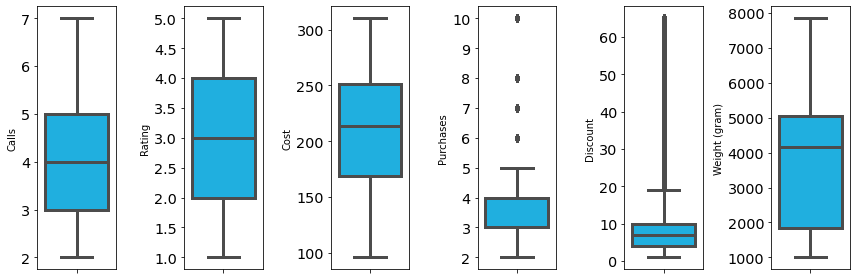

In [5]:
# cek boxplot kolom tipe data int/float uuntuk melihat outlier

for i in range(0, len(int)):
    plt.subplot(1, len(int), i+1)
    sns.boxplot(y=df[int[i]], color='deepskyblue', orient='v')
    plt.tight_layout()

Hanya feature discount yang merupakan feature numerik dan mempunyai outlier.

#### Remove Outlier Berdasarkan Z-Score

In [6]:
# Remove outlier Z-Score pada feature Discount

print(f'Jumlah baris sebelum outlier dihilangkan: {len(df)}')

zscore = abs(stats.zscore(df['Discount'])) # absolute z-scorenya
filtered_entries = (zscore < 3) # keep kurang dari 3 absolute z-scorenya
df = df[filtered_entries] # filter, ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah outlier dihilangkan: {len(df)}')


Jumlah baris sebelum outlier dihilangkan: 10999
Jumlah baris setelah outlier dihilangkan: 10818


#### Berdasarkan IQR

In [8]:
# Remove outliers menggunakan batas atas dan bawah IQR pada feature discount

Q11 = df['Discount'].quantile(0.25)
Q31 = df['Discount'].quantile(0.75)
IQR1 = Q31-Q11
low_limit1 = Q11 - (1.5*IQR1)
high_limit1 = Q31 + (1.5*IQR1)
filtered_entries = ((df['Discount'] >= low_limit1) 
                        & (df['Discount'] <= high_limit1))
df = df[filtered_entries]

print(f'Jumlah baris setelah outlier dihilangkan: {len(df)}')

Jumlah baris setelah outlier dihilangkan: 8604


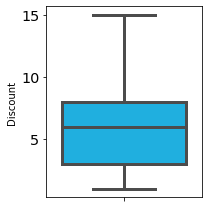

In [9]:
plt.figure(figsize = (3,3))
sns.boxplot(y=df['Discount'], color='deepskyblue', orient='v')
plt.tight_layout()

### D. Feature Transformation

#### Log Transformation

<AxesSubplot:xlabel='Discount', ylabel='Density'>

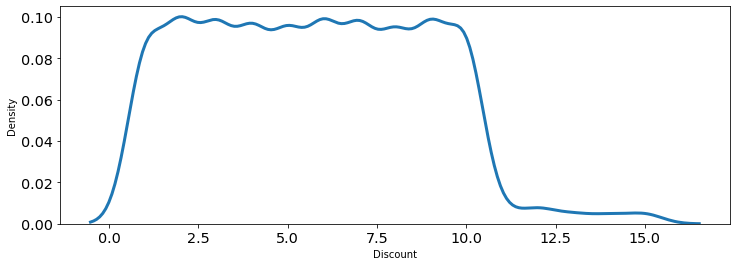

In [12]:
sns.kdeplot(df['Discount']) # hanya discount yang merupakan feature numerik distribusinya positively skewed

In [13]:
# cek nilai skewness feature discount

print('skewness feature diskon: ', df['Discount'].skew(axis=0, skipna=True))

skewness feature diskon:  0.22926712487076678


<AxesSubplot:xlabel='Discount', ylabel='Density'>

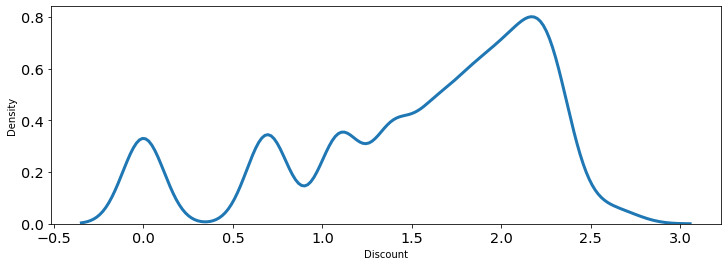

In [14]:
# log transformation feature discount

sns.kdeplot(np.log(df['Discount']))

In [15]:
# cek nilai skewness log discount

print('skewness feature diskon:', np.log(df['Discount']).skew(axis=0, skipna=True))

skewness feature diskon: -0.8344920682251297


Karena setelah dilakukan log transformasi nilai skewness-nya makin menjauh dari distribusi normal, maka metode log transformasi tidak dapat digunakan.

#### Standardization

Dilakukan pada feature Cost, Discount, dan Weight yang merupakan feature numerik dan memiliki nilai variance yang besar.

In [16]:
# Standardization pada kolom numerik
df['Std_Cost'] = StandardScaler().fit_transform(df['Cost'].values.reshape(len(df), 1))
df['Std_Disc'] = StandardScaler().fit_transform(df['Discount'].values.reshape(len(df), 1))
df['Std_Weight'] = StandardScaler().fit_transform(df['Weight (gram)'].values.reshape(len(df), 1))

In [17]:
# cek nilai variance sebelum distandarisasi

std_feature1 = ['Weight (gram)', 'Cost', 'Discount']

print('variance :') 
round(df[std_feature1].var(), 2)

variance :


Weight (gram)    2613757.66
Cost                2306.67
Discount               9.68
dtype: float64

In [18]:
# cek nilai standar deviasi sebelum distandarisasi

print('standard deviation :')
round(df[std_feature1].std(), 2)

standard deviation :


Weight (gram)    1616.71
Cost               48.03
Discount            3.11
dtype: float64

Terdapat nilai variance dan standar deviasi yang besar pada 3 feature tersebut sebelum dilakukan standarisasi.

In [19]:
# cek nilai variance setelah distandarisasi
std_feature2 = ['Std_Cost', 'Std_Disc', 'Std_Weight']

print('variance :')
round(df[std_feature2].var(), 2)

variance :


Std_Cost      1.0
Std_Disc      1.0
Std_Weight    1.0
dtype: float64

In [20]:
# cek nilai standar deviasi setelah distandarisasi

print('standard deviation :')
round(df[std_feature2].std(), 2)

standard deviation :


Std_Cost      1.0
Std_Disc      1.0
Std_Weight    1.0
dtype: float64

Nilai variance dan standar deviasi pada 3 feature tersebut semuanya sudah bernilai 1 setelah dilakukan standarisasi.

#### Normalization


Dilakukan pada feature Cost, Discount, dan Weight yang merupakan feature numerik dan memiliki nilai variance yang besar.

In [21]:
# Normalization pada feature numerik

df['Norm_Cost'] = MinMaxScaler().fit_transform(df['Cost'].values.reshape(len(df), 1))
df['Norm_Disc'] = MinMaxScaler().fit_transform(df['Discount'].values.reshape(len(df), 1))
df['Norm_Weight'] = MinMaxScaler().fit_transform(df['Weight (gram)'].values.reshape(len(df), 1))

In [22]:
# cek nilai min dan max setelah dinormalisasi

norm_feature2 = ['Norm_Weight', 'Norm_Cost', 'Norm_Disc']
df[norm_feature2].describe()

,Norm_Weight,Norm_Cost,Norm_Disc
count,8604.000000,8604.000000,8604.000000
mean,0.585027,0.551658,0.337418
std,0.316940,0.224429,0.222187
min,0.000000,0.000000,0.000000
25%,0.188198,0.364486,0.142857
50%,0.693982,0.584112,0.357143
75%,0.834983,0.738318,0.500000
max,1.000000,1.000000,1.000000


Semua nilai min dan max pada feature yang dinormalisasi sudah bernilai 0 dan 1.

In [23]:
df.head()

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchases,Importance,Gender,Discount,Weight (gram),Late,Std_Cost,Std_Disc,Std_Weight,Norm_Cost,Norm_Disc,Norm_Weight
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,-0.792394,1.374777,-1.737097,0.373832,0.642857,0.034503
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1,-1.083908,2.017775,-1.588639,0.308411,0.785714,0.081553
6,7,D,Flight,3,4,250,3,low,F,3,2371,1,0.748469,-0.875714,-0.998518,0.719626,0.142857,0.268575
8,9,A,Flight,3,4,150,3,low,F,11,1861,1,-1.333778,1.696276,-1.313991,0.252336,0.714286,0.168594
10,11,C,Flight,3,4,189,2,medium,M,12,2888,1,-0.521702,2.017775,-0.678714,0.434579,0.785714,0.369927


Tampilan dataset setelah dilakukan normalisasi dan standarisasi.

### E. Feature Encoding

#### Label Encoding

In [24]:
# label encoding pada feature gender (2 unique values) dan Product Importance (feature kategorikal yang ordinal)

# mapping feature gender
mapping_Gender = {
    'F' : 0,
    'M' : 1
}

# mapping feature product importance
mapping_Importance = {
    'low' : 0,
    'medium' : 1,
    'high' : 2,
}

# replace kolom gender yang telah dikuantifikasi di dataset
df['Gender'] = df['Gender'].map(mapping_Gender)
df['Importance'] = df['Importance'].map(mapping_Importance)

df

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchases,Importance,Gender,Discount,Weight (gram),Late,Std_Cost,Std_Disc,Std_Weight,Norm_Cost,Norm_Disc,Norm_Weight
3,4,B,Flight,3,3,176,4,1,1,10,1177,1,-0.792394,1.374777,-1.737097,0.373832,0.642857,0.034503
5,6,F,Flight,3,1,162,3,1,0,12,1417,1,-1.083908,2.017775,-1.588639,0.308411,0.785714,0.081553
6,7,D,Flight,3,4,250,3,0,0,3,2371,1,0.748469,-0.875714,-0.998518,0.719626,0.142857,0.268575
8,9,A,Flight,3,4,150,3,0,0,11,1861,1,-1.333778,1.696276,-1.313991,0.252336,0.714286,0.168594
10,11,C,Flight,3,4,189,2,1,1,12,2888,1,-0.521702,2.017775,-0.678714,0.434579,0.785714,0.369927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,1,0,1,1538,1,0.790114,-1.518712,-1.513791,0.728972,0.000000,0.105273
10995,10996,B,Ship,4,1,232,5,1,0,6,1247,0,0.373665,0.088782,-1.693797,0.635514,0.357143,0.048226
10996,10997,C,Ship,5,4,242,5,0,0,4,1155,0,0.581889,-0.554215,-1.750705,0.682243,0.214286,0.030190
10997,10998,F,Ship,5,2,223,6,1,1,2,1210,0,0.186262,-1.197213,-1.716684,0.593458,0.071429,0.040972


In [25]:
df['Gender'].value_counts()

0    4313
1    4291
Name: Gender, dtype: int64

In [26]:
df['Importance'].value_counts()

0    4185
1    3720
2     699
Name: Importance, dtype: int64

Feature Gender dan Product Importance sudah bertipe numerik.

#### One Hot Encoding

In [27]:
# one hot encoding di feature Warehouse dan Shipment (feature kategorikal yang tidak bersifat ordinal)

for cat in ['Warehouse', 'Shipment']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [28]:
df.head()

,ID,Warehouse,Shipment,Calls,Rating,Cost,Purchases,Importance,Gender,Discount,...,Norm_Disc,Norm_Weight,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship
3,4,B,Flight,3,3,176,4,1,1,10,...,0.642857,0.034503,0,1,0,0,0,1,0,0
5,6,F,Flight,3,1,162,3,1,0,12,...,0.785714,0.081553,0,0,0,0,1,1,0,0
6,7,D,Flight,3,4,250,3,0,0,3,...,0.142857,0.268575,0,0,0,1,0,1,0,0
8,9,A,Flight,3,4,150,3,0,0,11,...,0.714286,0.168594,1,0,0,0,0,1,0,0
10,11,C,Flight,3,4,189,2,1,1,12,...,0.785714,0.369927,0,0,1,0,0,1,0,0


Feature Warehouse dan Shipment sudah diencoding menjadi kolom-kolom baru yang tipenya numerik.

### F. Handle Class Imbalance

In [29]:
#cek ratio jumlah nilai target

df_late = df.groupby('Late').agg({'ID':'count'}).reset_index().rename(columns={'ID':'Jumlah'})
df_late['Ratio'] = df_late['Jumlah']*100/df_late['Jumlah'].sum()
df_late

,Late,Jumlah,Ratio
0,0,4436,51.557415
1,1,4168,48.442585


Tidak perlu dilakukan karena proportion of minority class > 40%

## 2. Feature Engineering

### A. Feature Selection

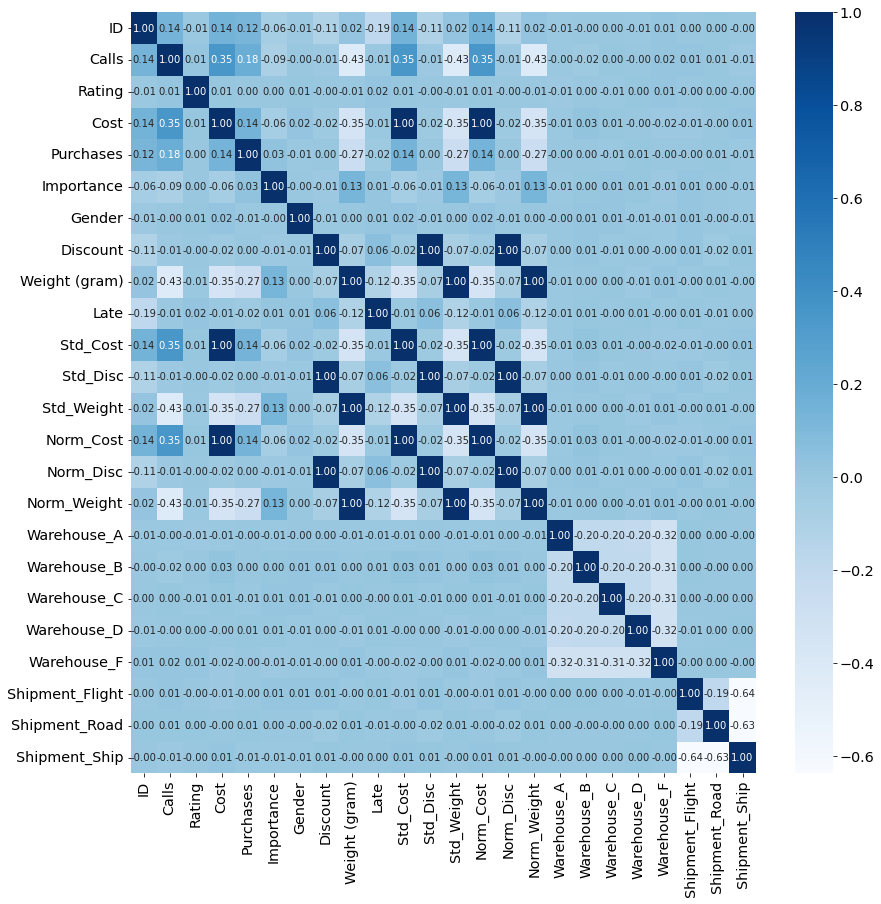

In [30]:
plt.figure(figsize=(14, 14))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

<b> Analisis Heatmap plot: </b>

- Menghapus feature  <b>ID </b> dikarenakan feature tersebut tidak memiliki arti penting untuk kegunaan proses modelling. <br>
- Menghapus feature <b> Warehouse </b> dan <b> Shipment </b> karena sudah dilakukan feature encoding. <br>
- Dari heatmap plot, tidak ada feature yang perlu dihapus karena tidak ada feature yang redundant dengan nilai korelasi antar feature > 0.7.

In [31]:
df.drop(columns=['ID', 'Warehouse', 'Shipment'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8604 entries, 3 to 10998
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Calls            8604 non-null   int64  
 1   Rating           8604 non-null   int64  
 2   Cost             8604 non-null   int64  
 3   Purchases        8604 non-null   int64  
 4   Importance       8604 non-null   int64  
 5   Gender           8604 non-null   int64  
 6   Discount         8604 non-null   int64  
 7   Weight (gram)    8604 non-null   int64  
 8   Late             8604 non-null   int64  
 9   Std_Cost         8604 non-null   float64
 10  Std_Disc         8604 non-null   float64
 11  Std_Weight       8604 non-null   float64
 12  Norm_Cost        8604 non-null   float64
 13  Norm_Disc        8604 non-null   float64
 14  Norm_Weight      8604 non-null   float64
 15  Warehouse_A      8604 non-null   uint8  
 16  Warehouse_B      8604 non-null   uint8  
 17  Warehouse_C  

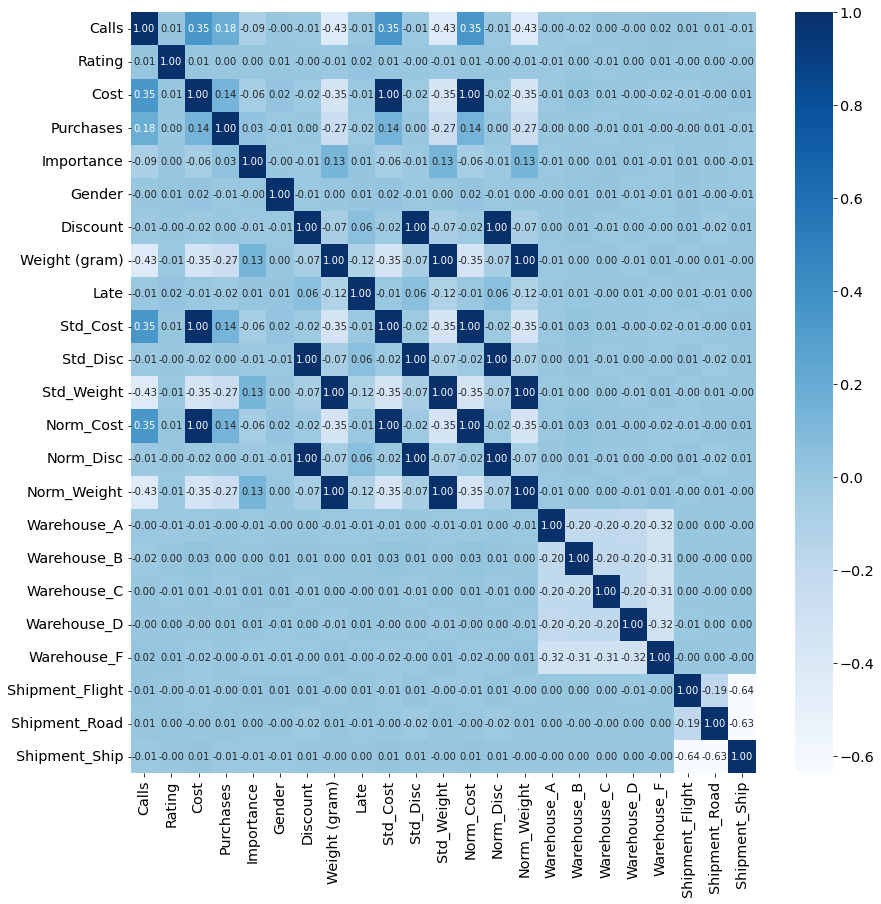

In [32]:
plt.figure(figsize=(14, 14))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')
plt.show()

### B. Feature Extraction

In [33]:
df

,Calls,Rating,Cost,Purchases,Importance,Gender,Discount,Weight (gram),Late,Std_Cost,...,Norm_Disc,Norm_Weight,Warehouse_A,Warehouse_B,Warehouse_C,Warehouse_D,Warehouse_F,Shipment_Flight,Shipment_Road,Shipment_Ship
3,3,3,176,4,1,1,10,1177,1,-0.792394,...,0.642857,0.034503,0,1,0,0,0,1,0,0
5,3,1,162,3,1,0,12,1417,1,-1.083908,...,0.785714,0.081553,0,0,0,0,1,1,0,0
6,3,4,250,3,0,0,3,2371,1,0.748469,...,0.142857,0.268575,0,0,0,1,0,1,0,0
8,3,4,150,3,0,0,11,1861,1,-1.333778,...,0.714286,0.168594,1,0,0,0,0,1,0,0
10,3,4,189,2,1,1,12,2888,1,-0.521702,...,0.785714,0.369927,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252,5,1,0,1,1538,1,0.790114,...,0.000000,0.105273,1,0,0,0,0,0,0,1
10995,4,1,232,5,1,0,6,1247,0,0.373665,...,0.357143,0.048226,0,1,0,0,0,0,0,1
10996,5,4,242,5,0,0,4,1155,0,0.581889,...,0.214286,0.030190,0,0,1,0,0,0,0,1
10997,5,2,223,6,1,1,2,1210,0,0.186262,...,0.071429,0.040972,0,0,0,0,1,0,0,1


Tidak ada fitur yang bisa diekstraksi dari dataset.

### C. Feature Tambahan

<b> 1. Waktu pengiriman <br> </b>
Bisa dilakukan analisis regresi untuk memprediksi waktu pengiriman customer di waktu yang akan datang.

<b> 2. Alamat customer (Kota-Provinsi/Luar negeri) <br> </b>
Jika jauh, potensi terlambat makin besar karena makin banyak peluang mengalami kendala pengiriman. <br>
Jika di luar negeri, potensi terlambat makin besar karena penyesuaian regulasi import dan eskport pengiriman barang. <br>

<b> 3. Alamat warehouse <br> </b>
Bisa digunakan untuk merekomendasikan warehouse mana yang paling dekat dengan alamat customer agar potensi keterlambatan dapat direduksi. <br>

<b> 4. Musim <br> </b>
Pada musim hujan atau musim dingin, moda pengiriman kapal bisa terkendala karena cuaca buruk bisa mengakibatkan dilarangnya kapal berlayar.

<b> 5. Kapasitas Pengiriman Per Hari <br> </b>
Makin sedikit kapasitas, potensi terlambat makin besar karena makin sedikit pengiriman dilakukan.

<b> 6. Traffic Route <br> </b>
Makin padat rute yang dipilih, potensi terlambat makin besar karena durasi pengiriman makin lama.